___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is necessary to take into account missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('creditcard.zip')

In [88]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [89]:
df.shape

(284807, 31)

In [90]:
df.duplicated().sum()

1081

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [92]:
# Change display settings to 2 decimal format
pd.options.display.float_format = '{:.2f}'.format

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,-0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,-0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


### Exploratory Data Analysis

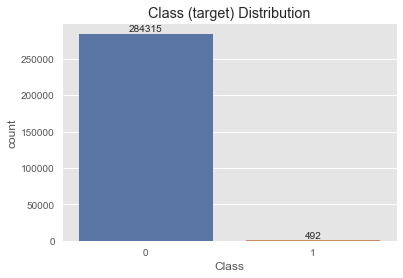

In [94]:
ax=sns.countplot(x="Class",data=df,palette="deep")
plt.title('Class (target) Distribution')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points');

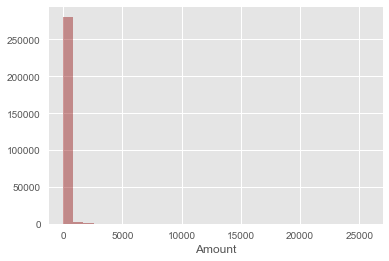

In [95]:
sns.distplot(df["Amount"].dropna(),kde=False,color="darkred",bins=30);

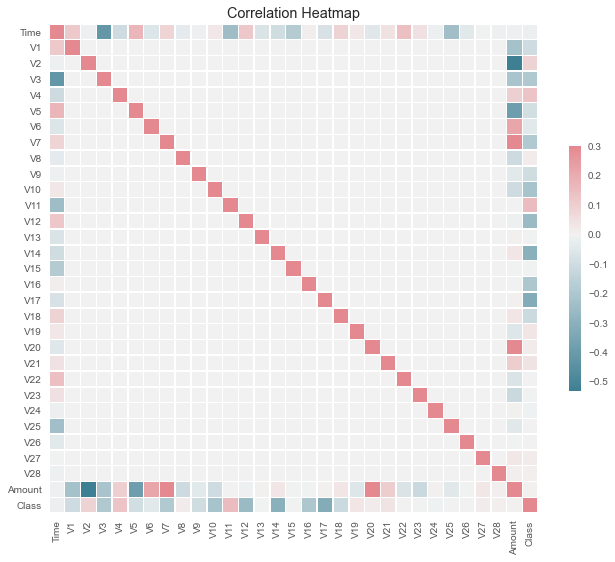

In [96]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

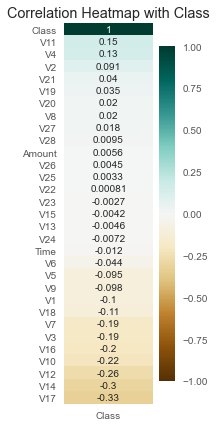

In [97]:
plt.figure(figsize=(2, 7))
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap with Class');

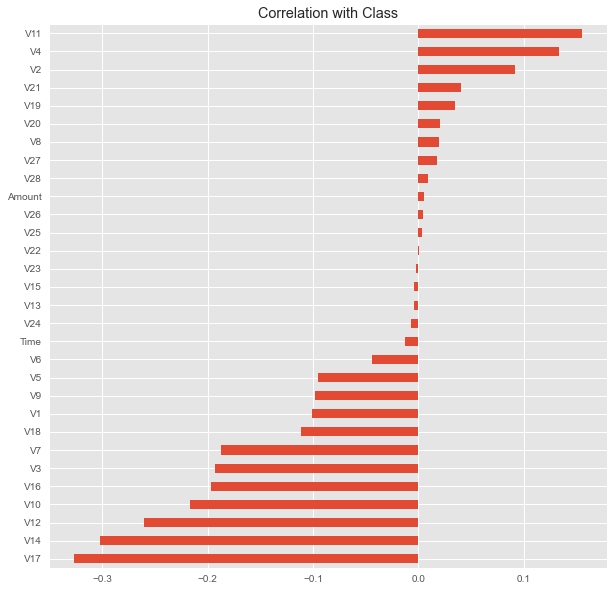

In [98]:
plt.figure(figsize=(10,10))
df.corr()["Class"].sort_values()[:-1].plot.barh()
plt.title('Correlation with Class');

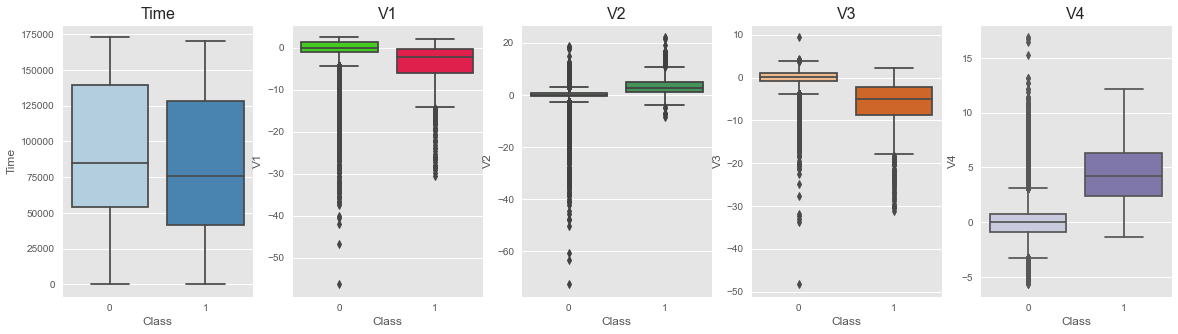

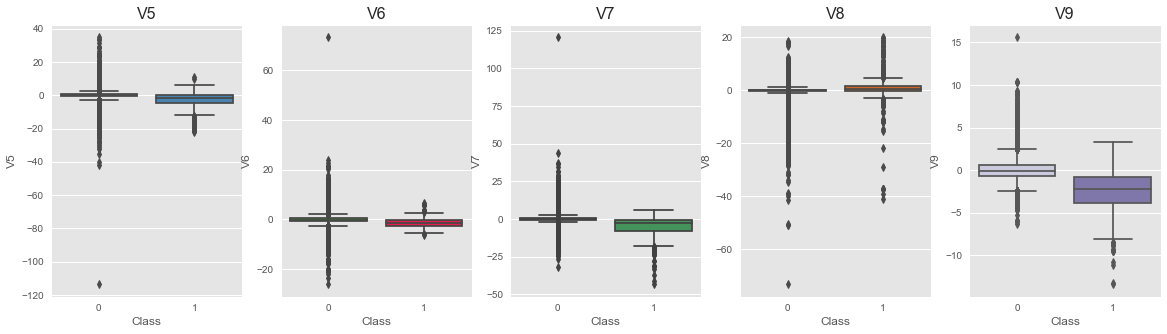

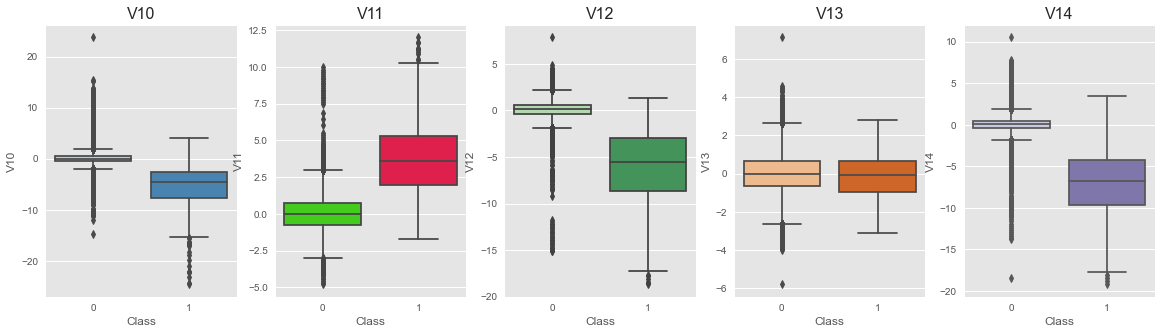

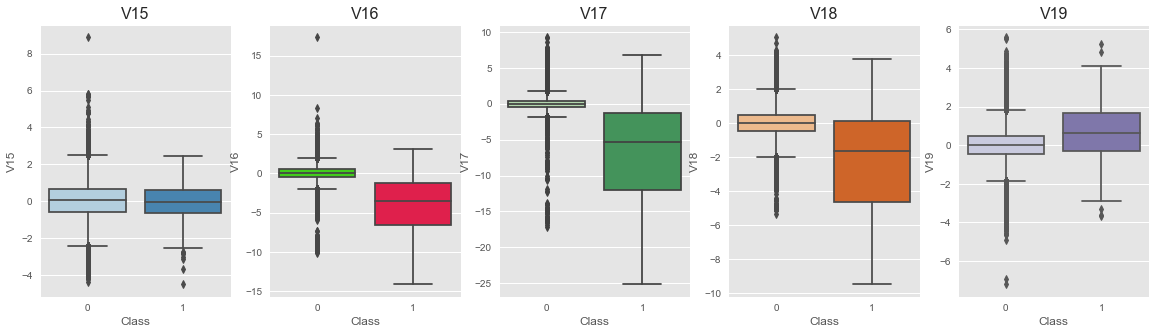

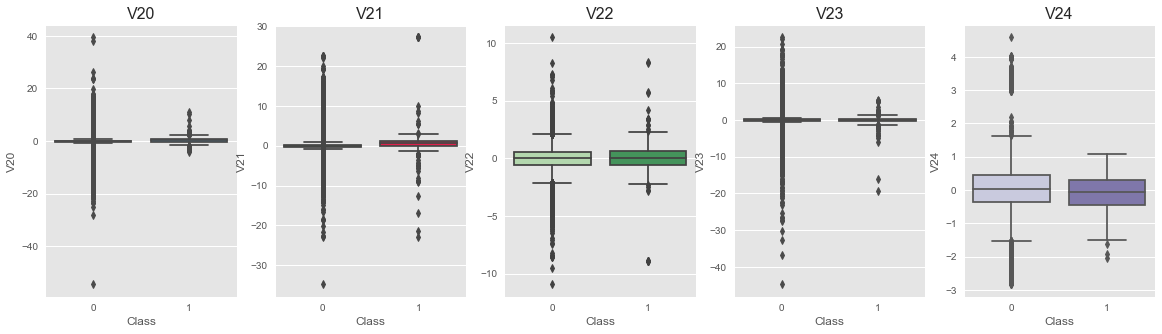

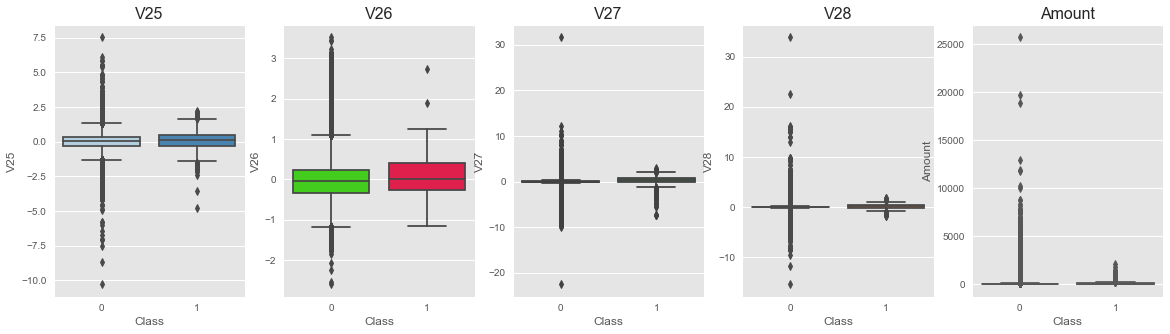

In [99]:
color=['Blues', 'prism', 'Greens', 'Oranges', 'Purples','prism']
for j in range(6):
    count=0
    plt.figure(figsize=(24,5))
    for i in df.columns[j*5:j*5+5]:
        plt.subplot(1, 6, count+1)
        count +=1
        sns.boxplot(y=df[i], data=df, x=df.Class, palette=color[count-1])
        plt.title(i, fontdict={'fontsize':16});

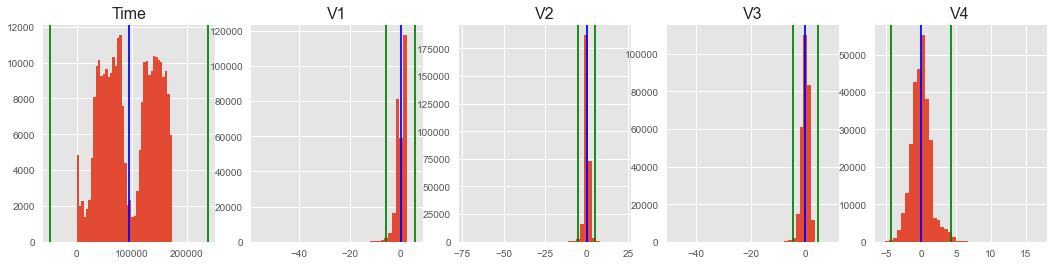

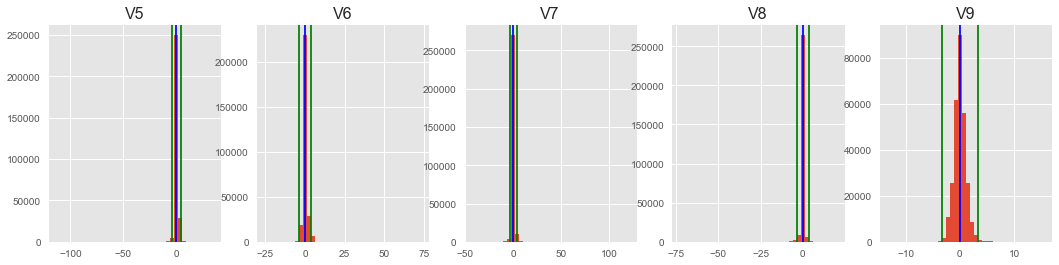

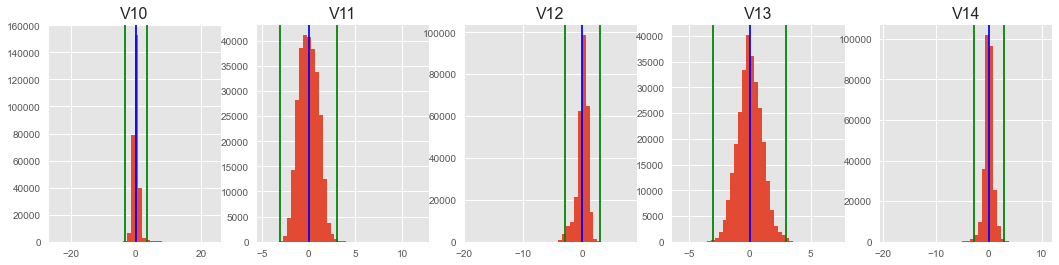

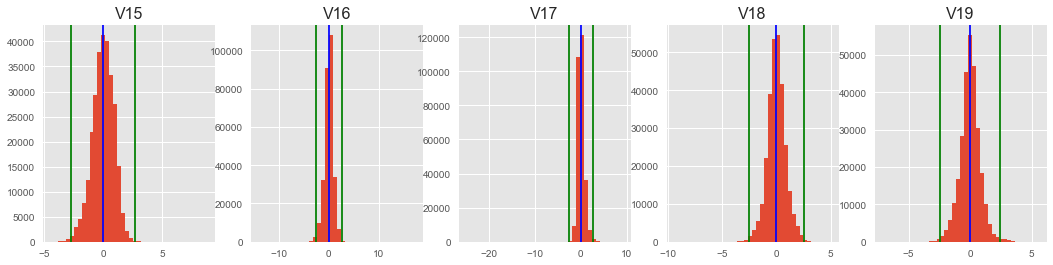

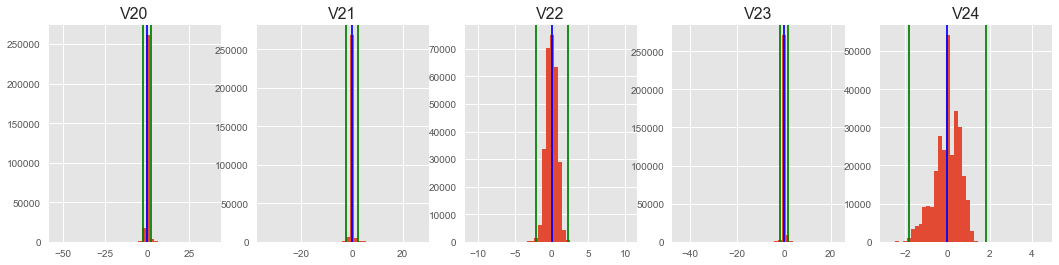

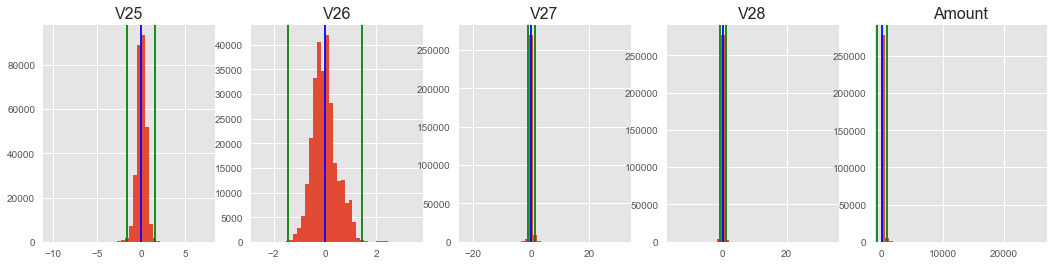

In [100]:
for j in range(6):
    count=0
    plt.figure(figsize=(18,4))
    for i in df.columns[j*5:j*5+5]:
        plt.subplot(1, 5, count+1)
        plt.hist(df[i], bins = 40)
        plt.axvline(x=df[i].mean() + 3*df[i].std(),color='green')
        plt.axvline(x=df[i].mean() - 3*df[i].std(),color='green')
        plt.axvline(x=df[i].mean(), color='blue')
        count +=1
        plt.title(i, fontdict={'fontsize':16});

### Data Cleaning
Check Missing Values and Outliers

In [101]:
df.isnull().sum().sum()

0

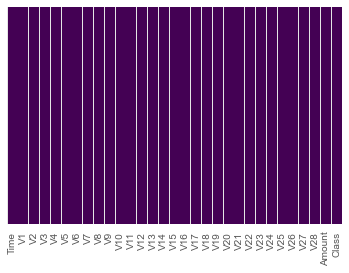

In [102]:
# Visual Representation of Missing Value Check
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis");

_No missing values_

In [103]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

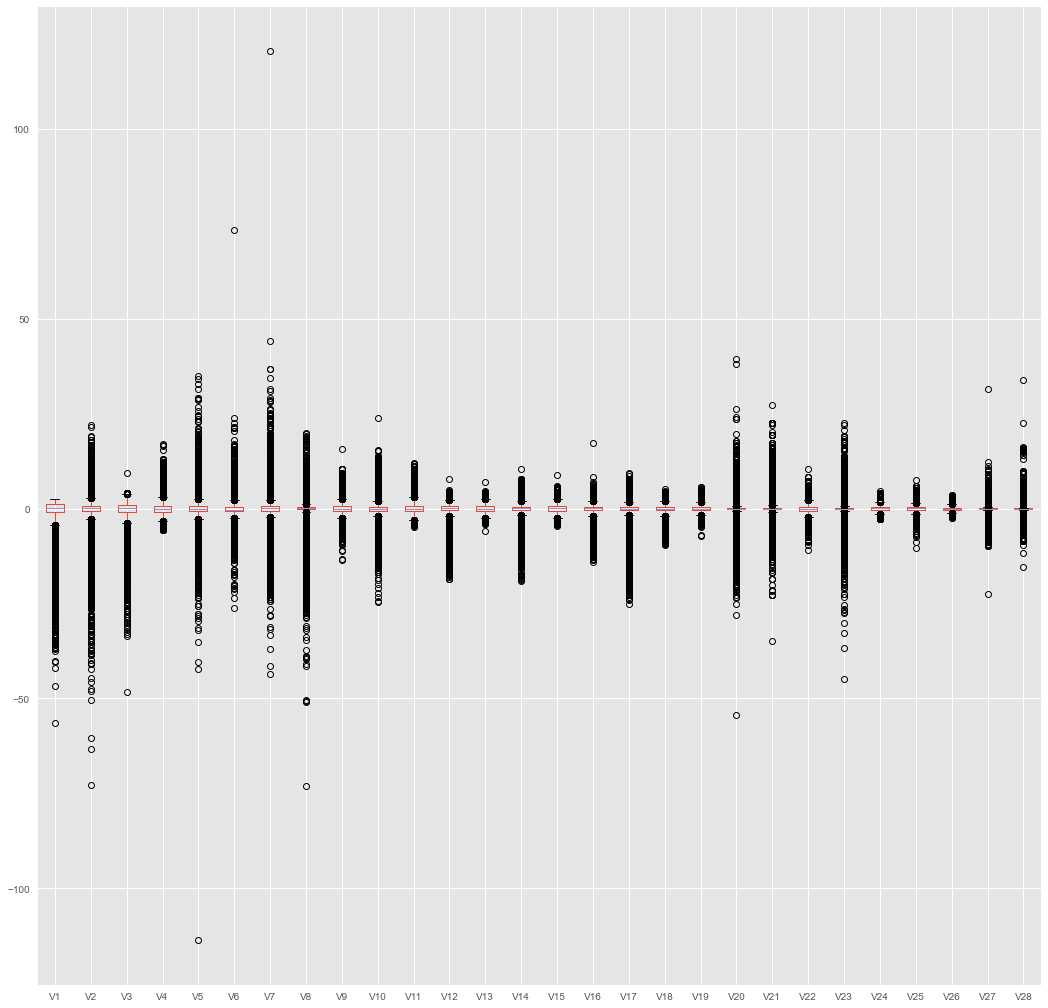

In [106]:
df.drop(['Time','Amount','Class'], axis=1).plot.box(figsize=(18,18));

_Dataset contains huge amount of outliers. However, it is not good idea to get rid of them, since fraud transactions have outlier tendency._

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [107]:
df_timeless = df.drop("Time", axis=1)

In [108]:
df_timeless

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,4.36,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


In [109]:
from sklearn.model_selection import train_test_split

y = df_timeless['Class']
X = df_timeless.drop("Class",axis=1)

# y = df['Class']
# X = df.drop("Class",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

In [110]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

In [111]:
y_test.value_counts()

0    56651
1       95
Name: Class, dtype: int64

#### Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values)

X_train = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

***ii. Model Training***

In [114]:
lg_model = LogisticRegression().fit(X_train, y_train)

***iii. Prediction and Model Evaluating***

In [115]:
lg_model.score(X_test,y_test)

0.9991188806259472

In [116]:
y_pred = lg_model.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



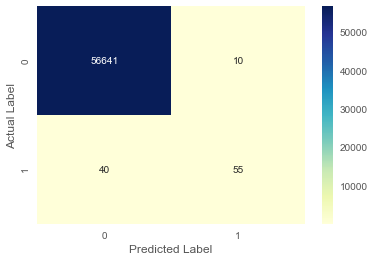

In [118]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

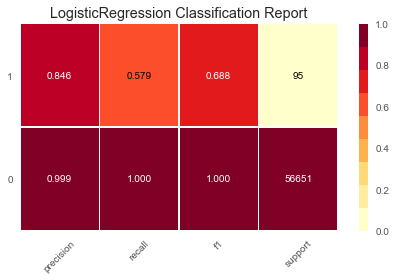

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [119]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lg_model, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [120]:

from sklearn.metrics import average_precision_score

avg_prec_lr1 = average_precision_score(y_test, y_pred)
acc_log=accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.4f}'.format(acc_log))
print('Average precision-recall score: {0:0.4f}'.format(avg_prec_lr1))

Accuracy: 0.9991
Average precision-recall score: 0.4906


***iv. Plot Precision and Recall Curve***


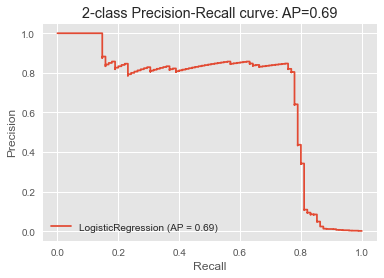

In [121]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = lg_model.decision_function(X_test)

average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(lg_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.show()

***v. Apply and Plot StratifiedKFold***

In [122]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)


target = df_timeless.loc[:,'Class']


model = LogisticRegression()

def train_model(train, test, fold_no):
    X = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
         'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
         'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    y = ['Class']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('Fold',str(fold_no),'Avg. Precision Score:{0:0.2f}'.format(average_precision_score(y_test,predictions)))

    
fold_no = 1
for train_index, test_index in skf.split(df_timeless, target):
    train = df_timeless.iloc[train_index,:]
    test = df_timeless.iloc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Avg. Precision Score:0.49
Fold 2 Avg. Precision Score:0.62
Fold 3 Avg. Precision Score:0.36
Fold 4 Avg. Precision Score:0.62
Fold 5 Avg. Precision Score:0.37


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [123]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [124]:
weights = np.linspace(0.004, 0.04, 10)
weights

array([0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032, 0.036,
       0.04 ])

Best parameters : {'smote__sampling_strategy': 0.012}


<AxesSubplot:xlabel='weight'>

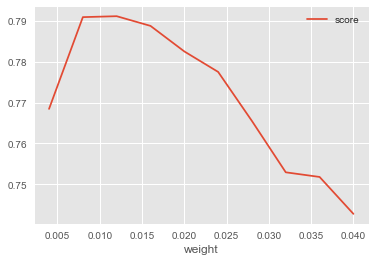

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train.values)

X_train = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)


pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.004, 0.04, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=5
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

***iii. Prediction and Model Evaluating***

***iv.  Plot Precision and Recall Curve***


***v. Apply and Plot StratifiedKFold***

In [126]:
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.016),
    LogisticRegression()
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.77      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



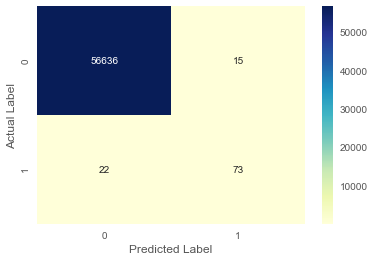

In [127]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [128]:
from sklearn.metrics import average_precision_score

avg_prec_lr1_sm = average_precision_score(y_test, y_pred)
acc_log_sm=accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.4f}'.format(acc_log_sm))
print('Average precision-recall score: {0:0.4f}'.format(avg_prec_lr1_sm))

Accuracy: 0.9993
Average precision-recall score: 0.6378


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)


sm = SMOTE(sampling_strategy= 0.016)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [131]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({0: 226602, 1: 378})
After SMOTE: Counter({0: 226602, 1: 3625})


In [132]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)

RandomForestClassifier()

***ii. Prediction and Model Evaluating***

In [133]:
y_pred = rf_model.predict(X_test)

In [134]:
r2_score(y_test, y_pred)

0.7153128713294419

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.77      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



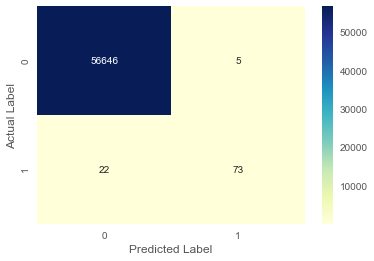

In [135]:
#0.016
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

***iii. Plot Precision and Recall Curve***


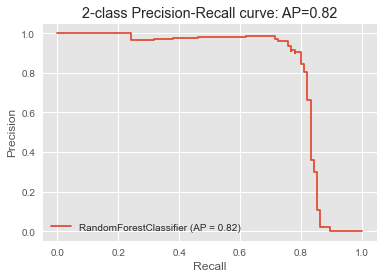

In [136]:
y_pred_proba = rf_model.predict_proba(X_test)

average_precision = average_precision_score(y_test, y_pred_proba[:,1])

disp = plot_precision_recall_curve(rf_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.show()

Text(0.5, 1.0, 'Random Forest Feature Importance')

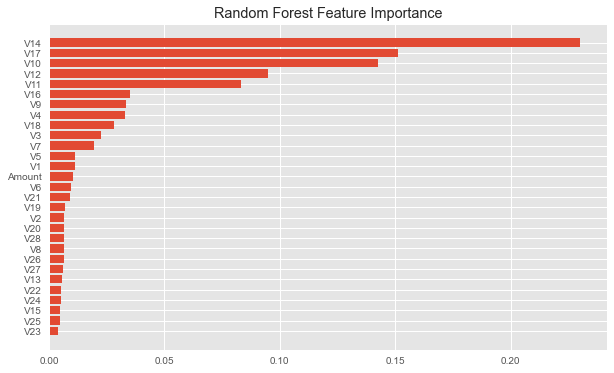

In [137]:
plt.figure(figsize=(10,6))
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")

***iv. Apply and Plot StratifiedKFold***

In [138]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5)


# df_timeless_smoted = SMOTE()


# target = df_timeless.loc[:,'Class']


# model = RandomForestClassifier()

# def train_model(train, test, fold_no):
#     X = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
#          'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
#          'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
#     y = ['Class']
#     X_train = train[X]
#     y_train = train[y]
#     X_test = test[X]
#     y_test = test[y]
#     model.fit(X_train,y_train)
#     predictions = model.predict(X_test)
#     print('Fold',str(fold_no),'Avg. Precision Score:',average_precision_score(y_test,predictions))

    
# fold_no = 1
# for train_index, test_index in skf.split(df_timeless_smoted, target):
#     train = df_timeless.iloc[train_index,:]
#     test = df_timeless.iloc[test_index,:]
#     train_model(train,test,fold_no)
#     fold_no += 1

In [139]:
from sklearn.metrics import average_precision_score

avg_prec_rf_sm = average_precision_score(y_test, y_pred)
acc_rf_sm=accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.4f}'.format(acc_rf_sm))
print('Average precision-recall score: {0:0.4f}'.format(avg_prec_rf_sm))

Accuracy: 0.9995
Average precision-recall score: 0.7196


### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train.values)

X_train = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)

# sm = SMOTE(sampling_strategy= 0.015)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [142]:
X_train.shape

(226980, 29)

***ii. Define Model***

In [177]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, mode="min", patience = 15, restore_best_weights=True)
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

***iii. Compile Model***

In [178]:

model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ["accuracy"])

***iv. Fit Model***

In [179]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size = 128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1, callbacks = [early_stop])

Epoch 1/100
1774/1774 [==============================] - 6s 3ms/step - loss: 0.6697 - accuracy: 0.6675 - val_loss: 0.2550 - val_accuracy: 0.9913
Epoch 2/100
1774/1774 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9940 - val_loss: 0.0642 - val_accuracy: 0.9986
Epoch 3/100
1774/1774 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9990 - val_loss: 0.0214 - val_accuracy: 0.9991
Epoch 4/100
1774/1774 [==============================] - 4s 2ms/step - loss: 0.0181 - accuracy: 0.9992 - val_loss: 0.0102 - val_accuracy: 0.9992
Epoch 5/100
1774/1774 [==============================] - 5s 3ms/step - loss: 0.0082 - accuracy: 0.9993 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 6/100
1774/1774 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 7/100
1774/1774 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0056 - val_ac

***v. Prediction and Model Evaluating***

Text(0.5, 1.0, 'Neural Network Loss-Accuracy')

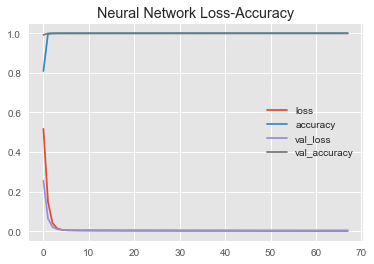

In [180]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title('Neural Network Loss-Accuracy');

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.76      0.80        95

    accuracy                           1.00     56746
   macro avg       0.92      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



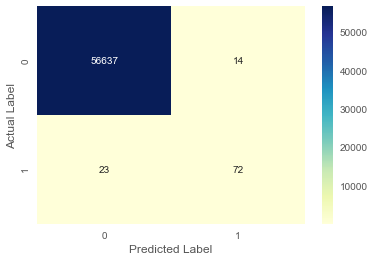

In [171]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [172]:
from sklearn.metrics import average_precision_score

avg_prec_nn_sm = average_precision_score(y_test, y_pred)
acc_nn_sm=accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.4f}'.format(acc_nn_sm))
print('Average precision-recall score: {0:0.4f}'.format(avg_prec_nn_sm))

Accuracy: 0.9993
Average precision-recall score: 0.6349


***vi. Plot Precision and Recall Curve***

### Model Comparison

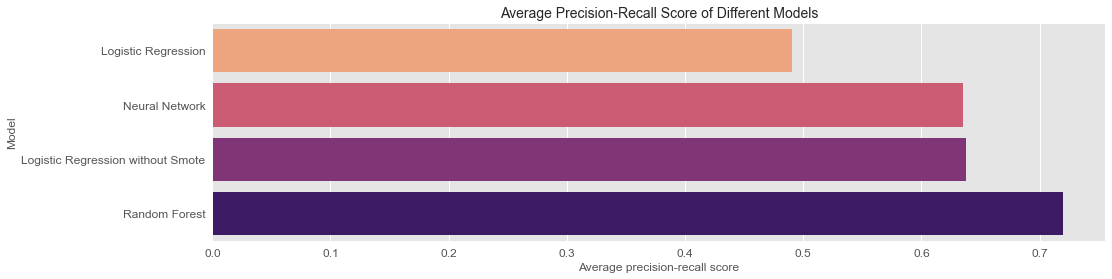

In [173]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "Neural Network", "Logistic Regression without Smote"],
                        "Average precision-recall score": [avg_prec_lr1, avg_prec_rf_sm, avg_prec_nn_sm, avg_prec_lr1_sm]})

compare = compare.sort_values(by="Average precision-recall score", ascending=True)

plt.figure(figsize=(16,4))
ax = sns.barplot(x="Average precision-recall score", y="Model", data=compare, palette="magma_r")

#plt.xlim(0.40, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Average Precision-Recall Score of Different Models", size=14);

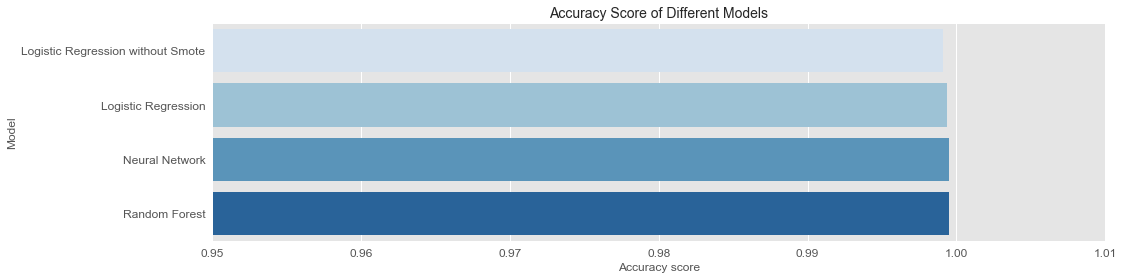

In [158]:

compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "Neural Network", "Logistic Regression without Smote"],
                        "Accuracy score": [acc_log_sm, acc_rf_sm, acc_nn_sm, acc_log]})

compare = compare.sort_values(by="Accuracy score", ascending=True)

plt.figure(figsize=(16,4))
ax = sns.barplot(x="Accuracy score", y="Model", data=compare, palette="Blues")

plt.xlim(0.95, 1.01)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [ ]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))

### Save and Export Variables as .pkl

In [ ]:
pickle.dump(X2.columns, open('variables.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___